In [266]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter

def initial_1(x):
    """initial condition of vibrating string as sin(4PIx)"""

    initial_condition = np.sin(2*np.pi*x)

    return initial_condition

def initial_2(x):
    """initial condition of vibrating string as sin(5PIx)"""

    initial_condition = np.sin(5*np.pi*x)

    return initial_condition

def initial_3(x):
    """initial condition of vibrating string as sin(5PIx) for 1/5 < x <2/5 """

    if 1/5 < x < 2/5:
        initial_condition = np.sin(5*np.pi*x) 
    else:
        initial_condition = 0

    return initial_condition

def advance_time(state,prev_state,c,dt,dx):
    """advance the wave equation by one timestep"""
    #get length of the string
    n = len(state)

    #empty array for new state
    new_state = np.zeros(n)

    for i in range(1,n-1):
        new_state[i] = c**2*(dt**2/dx**2)*(state[i+1]+state[i-1]-2*state[i]) + 2*state[i] - prev_state[i]

    return new_state

def first_timestep(state,c,dt,dx):
    """performs the very first iteration of the wave equation when
    a previous timestep is not available
    """
    #get length of the string
    n = len(state)

    #empty array for new state
    new_state = np.zeros(n)

    #loop through all values of the string skipping first and last
    for i in range(1,n-1):
        new_state[i] = 0.5*(c**2*(dt**2/dx**2)*(state[i+1]+state[i-1]-2*state[i]))+state[i]

    return new_state

# Plotting
Below we define code for plotting

### Time development of wave equation


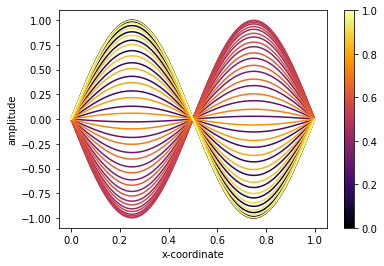

In [283]:
#model parameters
n=100
c=1
dt=0.001
dx=1/n

#x coordinates 
x = np.linspace(0,1,100)

#initial state
initial_state = initial_1(x)

#first timestep
new_state = first_timestep(initial_state,c,dt,dx)

#plot first timesteps
plt.plot(x, initial_state)
plt.plot(x,new_state)

#use color gradient for plots
colors = plt.cm.inferno(np.linspace(0,1,1000))

#list for storing all states
states = []

#initialize first state for the
prev_state = initial_state

#advance string for n timesteps
for i in range(1000):
    state = new_state
    new_state = advance_time(state,prev_state,c,dt,dx)
    prev_state = state

    if i %25 ==0:
        plt.plot(x,new_state,color=colors[i])
        states.append(new_state)

#add colorbar
colormap = plt.cm.get_cmap('inferno') # 'plasma' or 'viridis'
sm = plt.cm.ScalarMappable(cmap=colormap)
plt.colorbar(sm)

#plot labels
plt.xlabel("x-coordinate")
plt.ylabel("amplitude")

#save figure
plt.savefig("Figures/wave_init1_25.svg",format="svg", dpi=300)

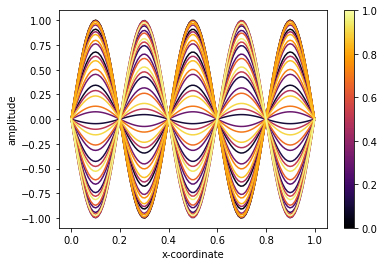

In [284]:
#initial state
initial_state = initial_2(x)

#first timestep
new_state = first_timestep(initial_state,c,dt,dx)

#plot first timesteps
plt.plot(x, initial_state)
plt.plot(x,new_state)

prev_state = initial_state

#advance string for n timesteps
for i in range(1000):
    state = new_state
    new_state = advance_time(state,prev_state,c,dt,dx)
    prev_state = state

    if i %25 ==0:
        plt.plot(x,new_state,color=colors[i])
        states.append(new_state)

#add colorbar
colormap = plt.cm.get_cmap('inferno') # 'plasma' or 'viridis'
sm = plt.cm.ScalarMappable(cmap=colormap)
plt.colorbar(sm)

#add labels
plt.xlabel("x-coordinate")
plt.ylabel("amplitude")

#save figure
plt.savefig("Figures/wave_init2_25.svg",format="svg", dpi=300)


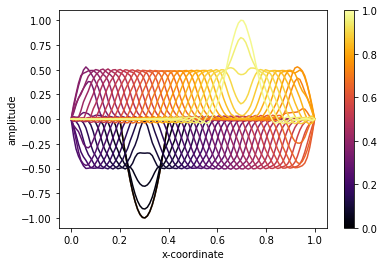

In [285]:
#initial state
initial_state = np.zeros(n)

for i,xs in enumerate(x):
    initial_state[i] = initial_3(xs)

#first timestep
new_state = first_timestep(initial_state,c,dt,dx)

#plot first timesteps
plt.plot(x, initial_state)
plt.plot(x,new_state)

prev_state = initial_state

#advance string for n timesteps
for i in range(1000):
    state = new_state
    new_state = advance_time(state,prev_state,c,dt,dx)
    prev_state = state

    if i %25 ==0:
        plt.plot(x,new_state,color=colors[i])
        states.append(new_state)


#add colorbar
colormap = plt.cm.get_cmap('inferno') # 'plasma' or 'viridis'
sm = plt.cm.ScalarMappable(cmap=colormap)
plt.colorbar(sm)

#add labels
plt.xlabel("x-coordinate")
plt.ylabel("amplitude")

#save figure
plt.savefig("Figures/wave_init3_25.svg",format="svg", dpi=300)

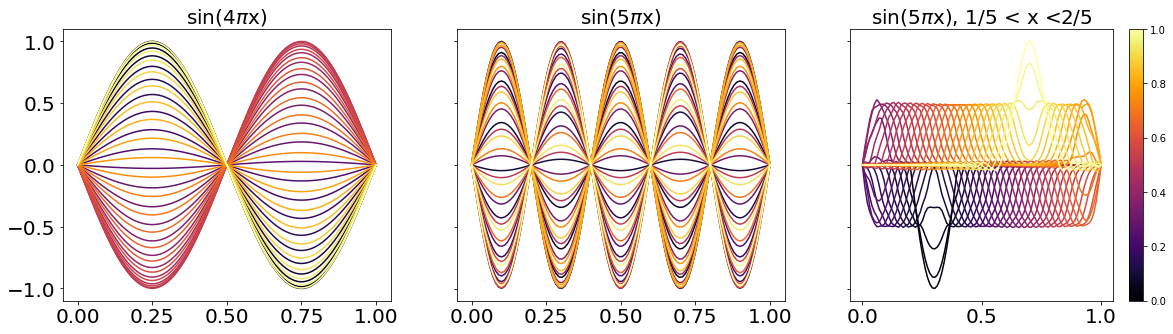

In [231]:
#Make a subplot containing all three figures
#plot each time as subplots in plot
fig, axs = plt.subplots(1,3,figsize=(20,5))

#use color gradient for plots
colors = plt.cm.inferno(np.linspace(0,1,40))

for i in range(0,40):
    axs[0].plot(x,states[i],color=colors[i])
axs[0].set_title('sin(4$\pi$x)',fontsize=20)

for i in range(40,80):
    axs[1].plot(x,states[i],color=colors[i-40])
axs[1].set_title('sin(5$\pi$x)',fontsize=20)

for i in range(80,120):
    axs[2].plot(x,states[i],color=colors[i-80])
axs[2].set_title('sin(5$\pi$x), 1/5 < x <2/5',fontsize=20)


# #Hide the axes to just show pictures.
for ax in axs:
    ax.label_outer()
    ax.tick_params(labelsize=20)

#add colorbar
colormap = plt.cm.get_cmap('inferno') # 'plasma' or 'viridis'
sm = plt.cm.ScalarMappable(cmap=colormap)
plt.colorbar(sm)

#save the plot
plt.savefig("Figures/wave_subplot_150.svg",format="svg", dpi=300)

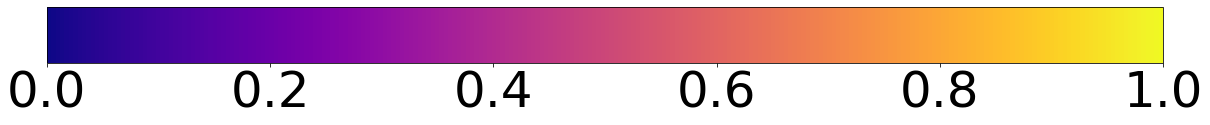

In [220]:
#plot colorbar separately to add later
#Save the colobar separately to add it more easily to the graphs later
a = np.array([[0,100]])
plt.figure(figsize=(20, 20))
img = plt.imshow(a)
plt.gca().set_visible(False)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('plasma')),orientation="horizontal")
tick_font_size = 50
cbar.ax.tick_params(labelsize=tick_font_size)

plt.savefig("Figures/colorbar_inferno_horizontal.svg",format="svg", dpi=300)


### Animation

In [297]:
#initialize the figure
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
 
def animate(i):
    """plots y-data for every state i in list"""

    #set range for x 
    space_labels = [0, 0.5, 1]
    space_ticks = [0, 99, 99]

    #clear the plot between steps
    ax.clear()

    #show time at current state (dt=0.001, every 25th iteration was saved)
    ax.set_title('time = '+str(round(i*dt*25, 3))+'s')

    #plot the states for inital conditions at ith time
    ax.plot(states[i])      # Sin(4pix)
    ax.plot(states[i+40])   # Sin(5pix)
    ax.plot(states[i+80])   # Sin(5pix)

    #set labels and axes
    ax.set_xlabel('x-coordinate')
    ax.set_ylabel('amplitude')
    ax.set_xticks(space_ticks, space_labels)
    ax.set_ylim([-1.1, 1.1])


#animate the function and
ani = anim.FuncAnimation(fig, animate, frames=40,interval=20, repeat=False)

plt.close()

#Save the animation as an animated GIF
ani.save("Gifs/wave_all.gif", dpi=300,writer=PillowWriter(fps=10))